# Introdução ao Matplotlib

- Matplotlib possui duas interfaces:

1. **Interface orientada a objetos**
    - São utilizado instancias de `axes.Axes` para renderizar visualizações em uma instancia de `figure.Figure`
    
 
2. **Interface baseada no MATLAB**
    - É encapsulada com o módulo `pyplot` que torna o uso mais intuitivo
    

- De qualquer forma, é importante saber que:
    - Uma Figura é uma imagem final que contém um ou mais `Axes`
    - `Axes` represenatam um plot individual
    - Nós chamamos métodos para plotar diretamente de um `Axes`, que nos dar muito mais flexibilidade e poder de customização do nosso plot
    
    
- Podemos usar a seguinte analogia para resumir:

![](assets/matplotlib-analogy.png)

## Um exemplo simples
- vamos começar com um exemplo bem básico para introduzir alguns conceitos e boas práticas para iniciarmos com a biblioteca

In [1]:
import matplotlib.pyplot as plt
import numpy as np

- Matplolib plota nossos dados em `Figures`, que podem conter um ou mais `Axes`
- `Axes` é uma área na qual pontos podem ser especificados em termos de coordenadas x-y, $\theta$-r em coordenadas polaters, x-y-z em plots 3D, etc
- Uma maneira simples de criar uma `Figure` com `Axes` é usando `pyplot.subplots`
- Depois, podemos usar `Axes.plot` para desenhar dados nos eixos

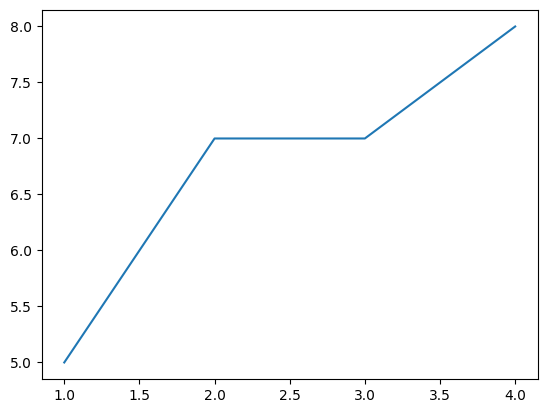

In [2]:
fig, ax = plt.subplots() # cria uma figura com um único eixo
ax.plot([1, 2, 3, 4], [5, 7, 7, 8]) # plota algum dado nos eixos

- Esse mesmo plot pode ser feito de maneira mais fácil sem precisar criar os eixos explícitamente:

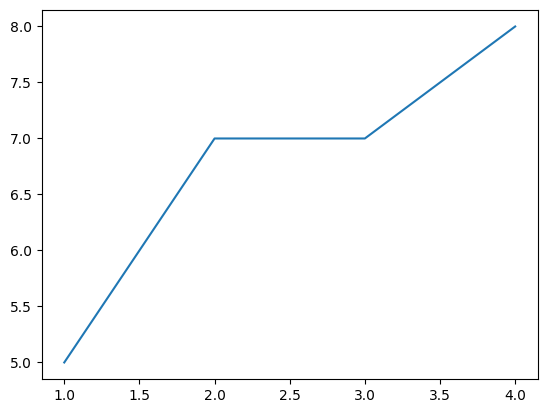

In [3]:
plt.plot([1, 2, 3, 4], [5, 7, 7, 8])

- Na verdade, para cada método disponível para `Axes`, existe uam função correspondente no subpacote `matplotlib.pyplot` que realiaza o plot nos eixos corerntes e cria os exisos e sua `Figure` mãe, caso ela não exista.

- Na sequência podemos ver uma layout deralhando os compomentes de um `Figure` da biblioteca:

![](assets/matplotlib-anatomy.png)

## `Figure`
- É a figura como um todo
- Mantém o track de todos os `Axes` filhos, um grupo de `Artists` especiais (títulos, legenda, etc), e do canvas
    - O canvas é o objeto que de fato desenha o plot, mas é praticamente invisível para o usuário
- Pode conter qualquer número de `Axes`, mas normalmente tem pelo menos um
- A maneria mais fácil de criar figuras é da seguinte forma:

<Figure size 640x480 with 0 Axes>

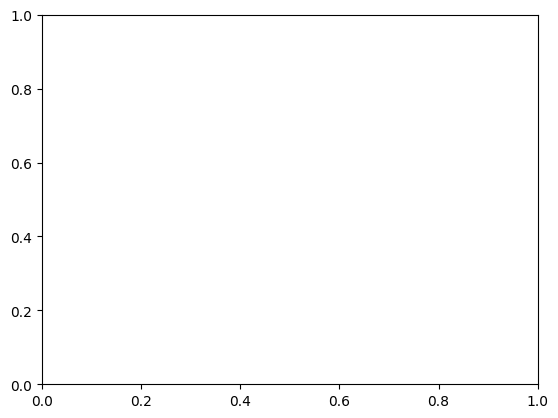

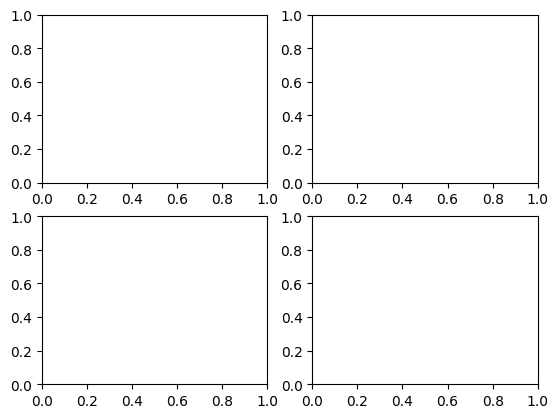

In [4]:
fig = plt.figure() # cria uma figura sem nenhum Axes
fig, ax = plt.subplots() # cria uma figura com um único Axes
fig, axs = plt.subplots(nrows=2, ncols=2) # cria uma figura com um grid de Axes 2 x 2

- É conveniente criamos os eixos e a figure juntos, mas nada impede de a criamos separado e adicionar o eixo depois

## `Axes`
- É o que achamos que é o plot. É a região dentro da imagem que possui os dados
- Uma `Figure` pode ter diversos `Axes`, mas um objeto `Axes` pode estar apenas em uma `Figure`
- `Axes` possuem 2 ou 3 `Axis` que determina os limites do dados
    - Temos que ter cuidado para não confundir `Axes` com `Axis` 
- Podemos controlar os limites usando métodos como `axes.Axes.set_xlim()` e `axes.Axes.set_ylim()`
- Cada `Axes` tem um título, definido com `set_title()`, um rótulo em x (`set_xlabel()`) e em y (`set_ylabel()`)
- A classe `Axes` e suas funções membros são primordiais para trabalhamos com a interface de orientação a objetos da biblioteca

## `Axis`
- Objetos mais semelhantes a uma reta numérica
- Definem limites do gráfico, geram os `ticks` (marcações nos eixos), `ticklabels` (marcações em forma de strings nos `ticks`)
- A localização dos `ticks` são determinados por objetos da classe `Locator`
- `ticklabels` são formatados pela classe `Formatter`
- A combinação dessas duas classes da total dos labels

## `Artist`
- Basicamente, tudo visível em uma `Figure` é um *artist* 
    - Até mesmo os objetos `Figure`, `Axes`, and `Axis`
- Esse conceito inclui também outros objetos como `Text`, `Line2D`, `Patch` etc
- Quando a figura é renderizada, todos os *artists* são desenhados no canvas
- A maioris dos `Artists` estão ligadas aos `Axes`
    - Uma vez que eles não podem ser compartilhados com múltiplos `Axes` e nem serem movidos de um para o outro

## Tipos de entradas para as funções de plot
- A entrada padrão esperada das funções é `np.array`
- Algumas classes, métodos ou funções podem funcionar com `array-like`, mas não é garantia
- A convenção é sempre converter para `np.array`

## Interface orientada a objetos
- Temos que explicitamente criar `Figure`s e `Axes` e chamar os métodos para eles
- Mesmo usando esse estilo, continuamos a usar o subpacote `pyplot`, mas indicando cada parte do plot
- Da muito controle e poder de customização

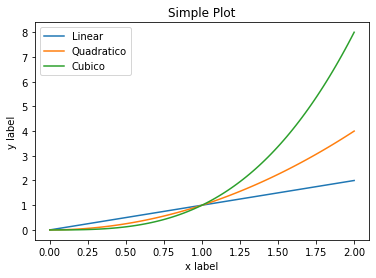

In [17]:
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots() # cria a figura e o axes

ax.plot(x, x)  # plota dados no axes
ax.plot(x, x**2) # plota mais dados no axes
ax.plot(x, x**3) # ...mais dados

ax.set_xlabel('Rotulo X')  # adicionar um rótulo para o eixo x
ax.set_ylabel('Rotulo Y')  # adicionar um rótulo para o eixo y
ax.set_title("Plot com OO")  # adiciona um título para o axes
ax.legend(["Linear", "Quadratico", "Cubico"])  # Adiciona a legenda

- Quando chamamos `ax.plot()` ele adiciona o plot no `Axes` para ser exibido na área de plot da `Figure`

## Interface simplificada (MATLAB-like)
- Matplotlib foi originalmente criada como uma alternativa para usuarios de MATLAB
- Basicamente, o subpacote `pyplot` faz todo trabalho pesado
- É uma interface *stateful*: mantém o tracking da `Figure` e `Axes` atual, que é onde todos os comandos `plt` são aplicados
- Podemos pegar uma referência para eles usando os métodos:
    - `plt.gcf()`: *get current figure*
    - `plt.gca()`: *get current axes* 
- É a forma mais rápida e fácil de usar a lib. Porém, da menos liberdade de customização
    - Sempre depende do que se quer como resultado
    - Para plots mais complicados, o método OO é recomendado
    - Porém, para plots simples, é uma questão de preferência

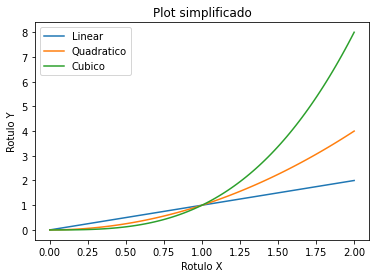

In [18]:
plt.plot(x, x, label='Linear')  # Plota dados no axes que está implicitoPlot some data on the (implicit) axes.
plt.plot(x, x**2, label='Quadratico')  # mais dados
plt.plot(x, x**3, label='Cubico') # mais dados
plt.xlabel('Rotulo X')
plt.ylabel('Rotulo Y')
plt.title("Plot simplificado")
plt.legend()

### Importante
- Se você estiver usando a biblioteca para gerar um plot fora de um Jupyter Notebook ou a IPython, você precisa chamar a função `plt.show()` para obter o plot
- Essa função faz bastante coisa por baixo dos panos
- Ela precisa interagir com o SO para realizar o plot
- Normalmente, ela deve ser chamada apenas uma vez
    - Em alguns casos, você até chama mais de uma vez, porém, você precisa resetar o plot
    - Caso não faça isso, você pode ter problema de acordo com o seu SO
- Todavia, se você salvar o seu plot em arquivo usando o `savefig()`, é opcional usar o `plt.show()`